In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', palette='deep')
pd.options.display.float_format = "{:,.2f}".format

## **Загрузка датасетов**

Загрузим сформированные на предыдущем шаге наборы данных *train_merged.csv* и *test_merged.csv*.

In [29]:
train_df = pd.read_csv('train_merged.csv')

In [30]:
train_df

,user_id,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,request_ts,country_id,region_id,timezone_id,browser,browser_version,os,os_version,target
0,fb858e8e0a2bec074450eaf94b627fd3,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1701011363,c31b4e,470e75,f6155e,Chrome Mobile,119.0.0,Android,10,0
1,46a5f128fd569c764a92c2eaa788095e,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1700986581,c31b4e,44520b,e56e80,Chrome Mobile,111.0.0,Android,10,0
2,5a74e9ac53ffb21a20cce117c0ad77ba,12498,2451,10304,-6380,11608,3106,-2188,10573,3347,21870,1701011071,c31b4e,616bb9,af47f1,Yandex Browser,20.12.5,Android,11,0
3,af735816ca19115431ae3d89518c8c91,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1700992803,c31b4e,3c9dca,e56e80,Chrome Mobile,119.0.0,Android,10,0
4,364f0ae0a3f29a685c4fb5bae6033b9a,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1701021666,c31b4e,776e76,10b7947,Yandex Browser,18.11.1,Android,4.4.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591830,3543d64627ead3a519e3199834e2a148,12332,17481,12664,-984,5146,11562,4316,15017,1423,-981,1700994910,c31b4e,33ed7a,10b7947,Chrome Mobile,105.0.0,Android,11,0
591831,37df5ff1d739f61d442b164db6281e46,13459,-6413,13160,13187,5498,3875,13246,10259,-1630,-14647,1700989030,c31b4e,97023a,e56e80,Chrome Mobile,94.0.4606,Android,11,0
591832,b28dbf7b0f2bcbdf01c52715573b93b5,13459,-6413,13160,13187,5498,3875,13246,10259,-1630,-14647,1700980358,c31b4e,21d92d,f6155e,Chrome Mobile,119.0.0,Android,10,0
591833,dd58499b49a3cbb2b5699ac812c6bbc6,18174,17591,3257,2581,8043,13263,2312,1791,9121,5170,1700989155,11f5678,NaN,a3f791,Chrome Mobile,119.0.0,Android,10,1


In [31]:
test_df = pd.read_csv('test_merged.csv')

In [32]:
test_df

,user_id,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,request_ts,country_id,region_id,timezone_id,browser,browser_version,os,os_version
0,c2802dadd33d8ae09bb366bdd41212ea,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1700993094,c31b4e,36e3f3,f6155e,Chrome Mobile,96.0.4664,Android,12
1,e5b1988db74527ec092f28b0bbfdaac9,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1701005579,c31b4e,8ccc01,e56e80,Chrome,116.0.5845,Android,10
2,6ef1eedbdb72554e53e69782066065c5,-7307,11682,9741,13564,13577,1200,10169,16461,-3932,3340,1700969752,c31b4e,1fbfa5,e56e80,Chrome,114.0.0,Android,10
3,7e057293ecae62985a327b7af51858ea,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1700991608,c31b4e,f66ff,f6155e,Chrome Mobile,91.0.4472,Android,11
4,a27bd7ce8828497823fa8d5d05e7bbf7,11731,4045,22213,-1184,-8992,9381,-3496,-3120,-899,16817,1701019815,c31b4e,245864,e56e80,Chrome Mobile,119.0.0,Android,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102662,6f107249e2712bbbb0a7f570ba9df354,17213,5295,11609,6110,6486,6537,13182,9876,4621,-13610,1700997247,11585fb,NaN,eb0a48,Chrome Mobile,119.0.0,Android,10
102663,ebd1057e99ffdc05159a04b603bf7853,11702,-4540,10118,-5,9443,3388,-2603,8941,2579,24818,1700990522,c31b4e,36e3f3,f6155e,Chrome,112.0.0,Android,11
102664,ee0e160fa1d9e81dc4c2282264c5008e,-3467,13781,5375,8672,11148,6967,16862,14771,-1637,6310,1701012338,c31b4e,33ed7a,10b7947,Yandex Browser,23.7.8,Android,12
102665,0467ee1c793c11e62d912f5ac89437d7,13459,-6413,13160,13187,5498,3875,13246,10259,-1630,-14647,1701008657,c31b4e,2f1b83,c1ffd0,Chrome Mobile,116.0.0,Android,10


## **Разведовательный анализ данных**

Узнаем сколько в среднем запросов приходится на одного пользователя.

In [33]:
round(train_df['user_id'].value_counts().mean(), 2)

np.float64(1.18)

Посмотрим на соотношение классов.

In [34]:
user_labels = train_df.groupby('user_id')['target'].first()
counts = user_labels.value_counts().sort_values(ascending=False)

pd.DataFrame({'count': counts, 'proportion': (counts / len(user_labels) * 100)})

,count,proportion
target,,
0,261520,52.30
1,238479,47.70


### Анализ географических данных

Посмотрим на распределение признаков, заменив пропущенные значения на "unknown", а редкие категории сгруппируем в одну категорию "other".

In [35]:
geo_data = train_df[['country_id', 'region_id', 'timezone_id', 'target']].copy().fillna('unknown')

In [36]:
def group_rare_categories(data, threshold=1.0, label='other'):
    proportion = data.value_counts(normalize=True) * 100
    rare_categories = proportion[proportion < threshold].index

    return data.apply(lambda x: label if x in rare_categories else x)

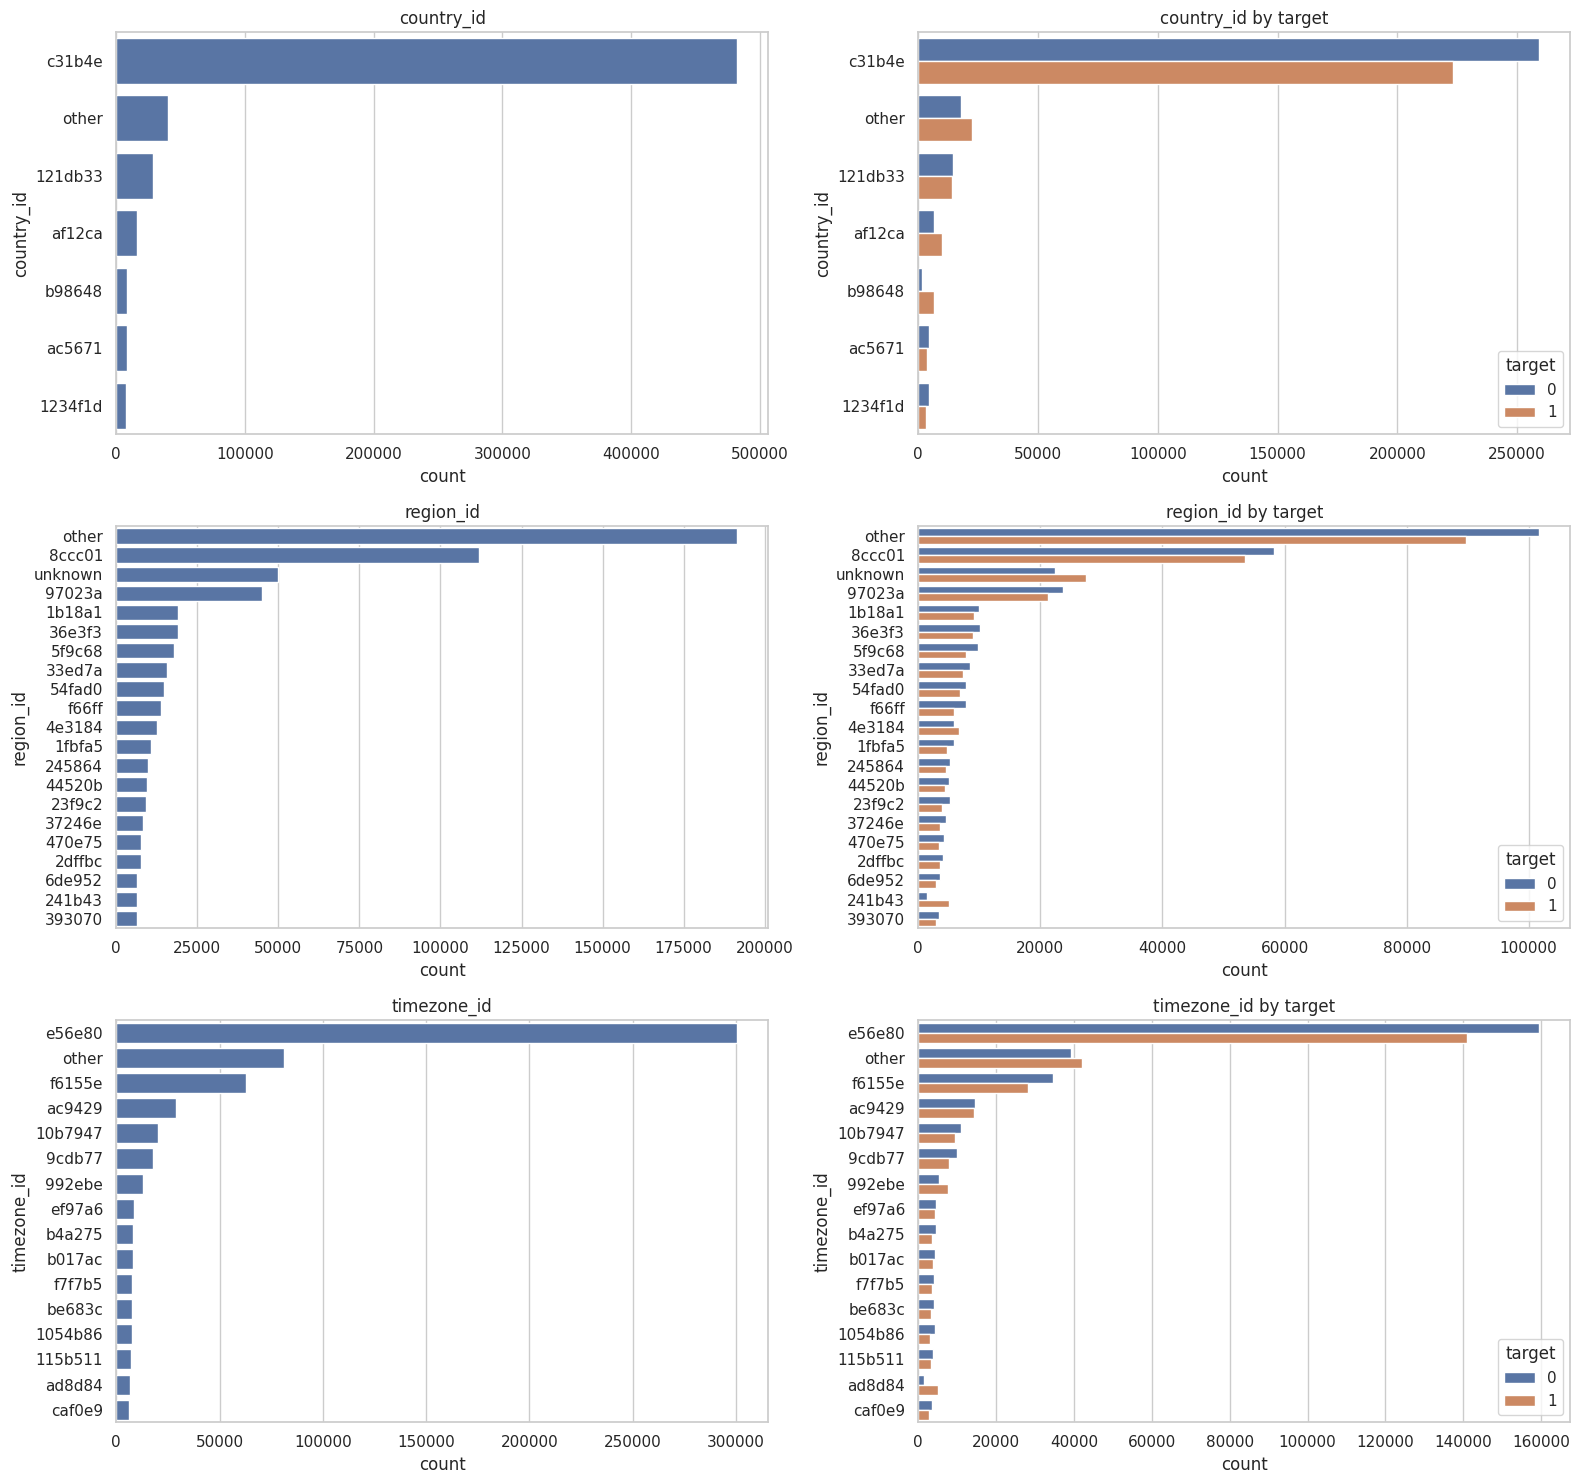

In [37]:
geo_features = ['country_id', 'region_id', 'timezone_id']
fig, axes = plt.subplots(len(geo_features), 2, figsize=(16, 5 * len(geo_features)))

for i, feature in enumerate(geo_features):
    geo_data[feature] = group_rare_categories(geo_data[feature])

    sns.countplot(data=geo_data, y=feature, order=geo_data[feature].value_counts().index, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature}')

    sns.countplot(data=geo_data, y=feature, hue='target', order=geo_data[feature].value_counts().index, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} by target')

plt.tight_layout()
plt.show()

Признаки **country_id**, **region_id** и **timezone_id** дублируют информацию о географическом местоположении. Отберем самый информативный признак.

* **country_id**: одна доминирующая категория (c31b4e), остальные редкие;

* **region_id**: достаточно равномерное распределение категорий;

* **timezone_id**: одна доминирующая категория (e56e80), остальные редкие.

Лучшим кандидатом является **region_id**.

### Анализ признака **request_ts**

Данный признак содержит серверное время в формате unix, оно может не совпадать с локальным временем пользователя, в наборе данных есть признак **timezone_id**, но он содержит только id временной зоны, поэтому узнать локальное время пользователя не получится.

Тем не менее посмотрим на поведение пользователей в течении дня, недели, месяца, года относительно серверного времени.

In [38]:
ts_data = train_df[['request_ts', 'target']].copy()

Добавим соответствующие признаки и построим графики.

In [39]:
ts_data['datetime'] = pd.to_datetime(ts_data['request_ts'], unit='s')

ts_data['hour'] = ts_data['datetime'].dt.hour
ts_data['day_of_week'] = ts_data['datetime'].dt.dayofweek

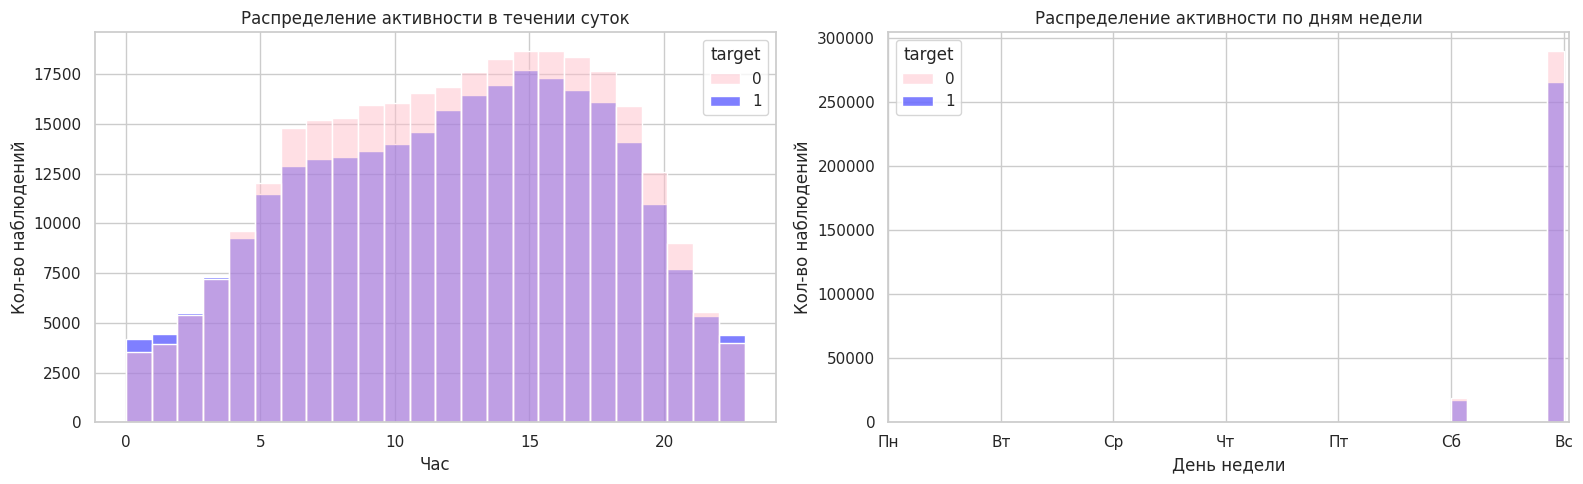

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=ts_data, x='hour', hue='target', bins=24, palette=['pink', 'blue'], ax=ax1)
ax1.set_title('Распределение активности в течении суток')
ax1.set_xlabel('Час')
ax1.set_ylabel('Кол-во наблюдений')

sns.histplot(data=ts_data, x='day_of_week', hue='target', bins=7, palette=['pink', 'blue'], ax=ax2)
ax2.set_title('Распределение активности по дням недели')
ax2.set_xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
ax2.set_xlabel('День недели')
ax2.set_ylabel('Кол-во наблюдений')

plt.tight_layout()
plt.show()

В течении дня активность мужчин и женщин практически не отличается.

Из-за потенциального смещения (из-за временных зон) и малой информативности не будем использовать этот признак.

### Анализ данных о бразуерах и операционных системах

Посмотрим, как распределены категории в признаках **browser** и **os**. Признаки **browser_version** и **os_version** явно содержат избыточную информацию.

In [41]:
agent_data = train_df[['browser', 'os', 'target']].copy()

In [42]:
def simplify_browser(browser_name):
    browser_name = browser_name.strip().lower()

    chrome_browsers = {'chrome mobile', 'chrome', 'chrome mobile webview', 'chrome mobile ios'}
    yandex_browsers = {'yandex browser', 'yandexsearch'}
    safari_browsers = {'mobile safari', 'safari', 'mobile safari ui/wkwebview'}
    edge_browsers = {'edge', 'edge mobile'}
    firefox_browsers = {'firefox', 'firefox mobile', 'firefox ios'}
    opera_browsers = {'opera', 'opera mobile', 'opera mini'}

    if browser_name in chrome_browsers:
        return 'chrome'
    elif browser_name in yandex_browsers:
        return 'yandex'
    elif browser_name in safari_browsers:
        return 'safari'
    elif browser_name in edge_browsers:
        return 'edge'
    elif browser_name in firefox_browsers:
        return 'firefox'
    elif browser_name in opera_browsers:
        return 'opera'
    else:
        return 'other'


def simplify_os(os_name):
    os_name = os_name.strip().lower()

    if os_name in ['android']:
        return 'android'
    elif os_name in ['windows', 'windows phone']:
        return 'windows'
    elif os_name in ['ios', 'mac os x']:
        return 'apple'
    else:
        return 'other'

In [43]:
agent_data['browser'] = agent_data['browser'].apply(simplify_browser)
agent_data['os'] = agent_data['os'].apply(simplify_os)

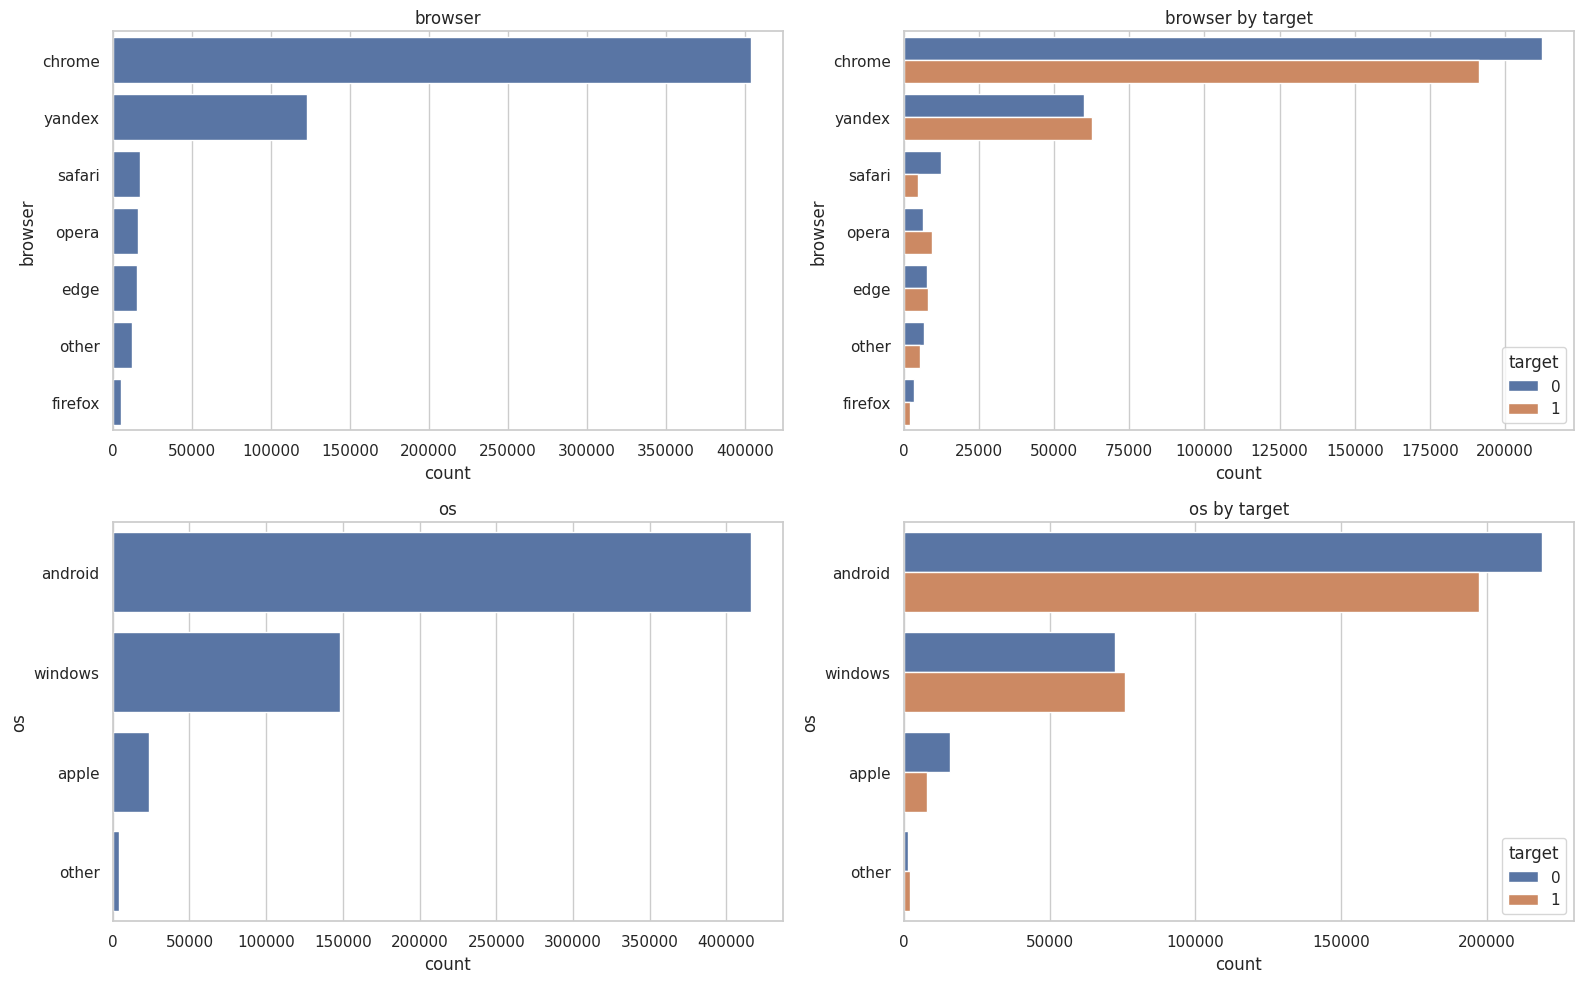

In [44]:
agent_features = ['browser', 'os']
fig, axes = plt.subplots(len(agent_features), 2, figsize=(16, 5 * len(agent_features)))

for i, feature in enumerate(agent_features):
    sns.countplot(data=agent_data, y=feature, order=agent_data[feature].value_counts().index, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature}')

    sns.countplot(data=agent_data, y=feature, hue='target', order=agent_data[feature].value_counts().index, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} by target')
    axes[i, 1].legend(title='target', loc='lower right')

plt.tight_layout()
plt.show()

### Анализ запросов пользователей

Визуализируем признаки **component0** - **component9**, с помощью PCA.

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
emb2d = pca.fit_transform(train_df[[f'component{i}' for i in range(10)]])

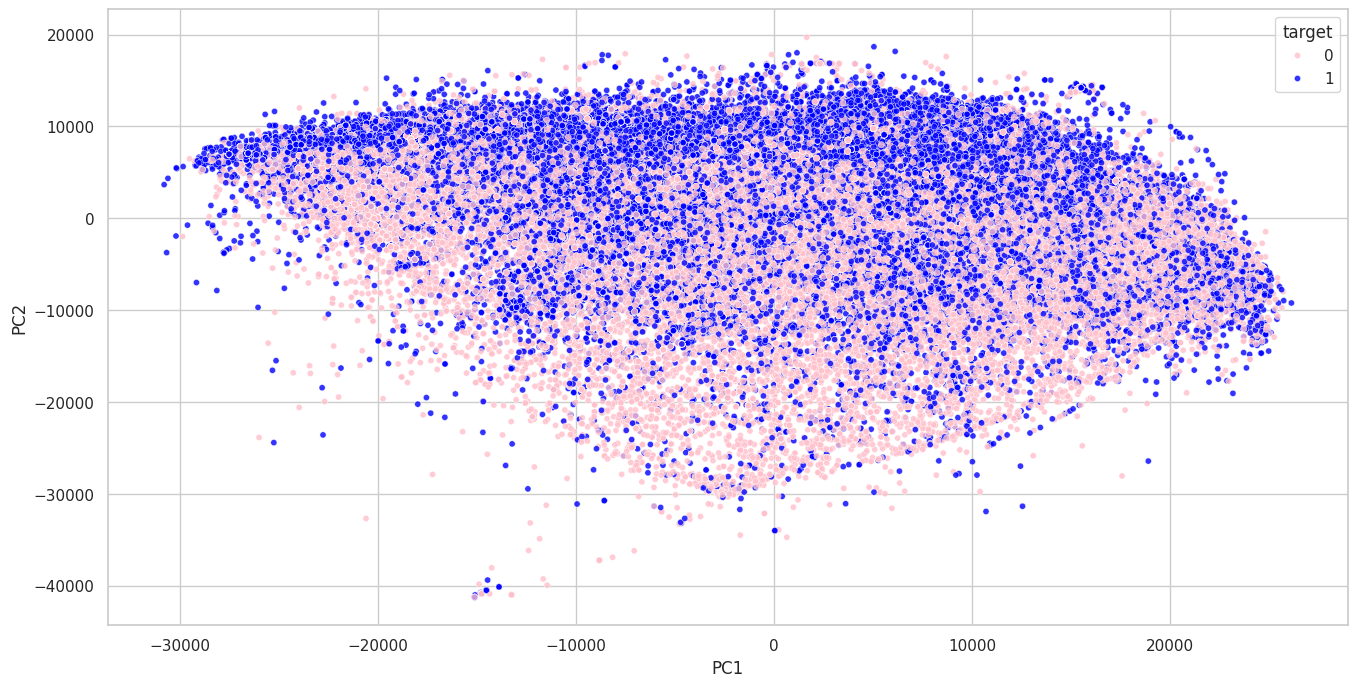

In [46]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=emb2d[:, 0], y=emb2d[:, 1], hue=train_df['target'], palette=['pink', 'blue'], alpha=0.8, s=20 )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='target')
plt.show()

## **Отбор и преобразование признаков**

Исключим из датасетов, следующие признаки: **request_ts**, **country_id**, **timezone_id**, **browser_version**, **os_version**.

In [47]:
train_df.drop(columns=['request_ts', 'country_id', 'timezone_id', 'browser_version', 'os_version'], inplace=True)
test_df.drop(columns=['request_ts', 'country_id', 'timezone_id', 'browser_version', 'os_version'], inplace=True)

Преобразуем признаки **region_id**, **broswer** и **os** в тренировочном наборе.

In [48]:
train_df['region_id'] = geo_data['region_id']
train_df['browser'] = agent_data['browser']
train_df['os'] = agent_data['os']

Выполним аналогичные преобразования на тестовом наборе.

In [49]:
test_df['region_id'] = test_df['region_id'].fillna('unknown')
regions = train_df['region_id'].value_counts().index.tolist()
test_df['region_id'] = test_df['region_id'].apply(lambda x: x if x in regions else 'other')
test_df['browser'] = test_df['browser'].apply(simplify_browser)
test_df['os'] = test_df['os'].apply(simplify_os)

В процессе преобразования могли появится дубликаты, удалим их.

In [50]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

## **Скачивание полученных датасетов**

In [51]:
# train_df.to_csv('train_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)